### Mason Manca
### CPSC 323
### Prof. Morehead
### 3 November 2022

#### First we must read in the data, and split it into train/test

In [5]:
import pandas as pd
import numpy as np
import time as tm
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import pearsonr


In [6]:
class Model():
    # Initializing variables
    def __init__(self):
        self.train_df = self.val_df = self.X_train = self.X_val = self.y_train = self.y_val = pd.DataFrame()
        self.num_features = []
    
    def split_into_sets(self,df):
        self.train_df = df.sample(frac=0.75, random_state=4)
        self.val_df = df.drop(self.train_df.index)
        
        max_val = self.train_df.max(axis= 0)
        min_val = self.train_df.min(axis= 0)
 
        # Scaling our data so it is in the same range
        range = max_val - min_val
        self.train_df = (self.train_df - min_val)/(range)
 
        self.val_df =  (self.val_df- min_val)/range
        
        # Splitting the data into training and testing data

        self.X_train = self.train_df.drop('Head Size(cm^3)',axis=1) # targets 
        self.X_val = self.val_df.drop('Head Size(cm^3)',axis=1) # label
        self.y_train = self.train_df['Brain Weight(grams)'] # targets
        self.y_val = self.val_df['Brain Weight(grams)'] # label

        self.num_features = [self.X_train.shape[1]]
        print(self.num_features)
       

    def linearModel(self):
        model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=1,input_shape=self.num_features)])

    def createNetwork(self):
        sequentialModel = tf.keras.Sequential([
 
        tf.keras.layers.Dense(units=64, activation='relu', input_shape=self.num_features),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=1)])
        
        sequentialModel.compile(optimizer='adam',loss='mse',metrics=['mae','mse'])

        sequentialModel.summary()
        return sequentialModel

    def calculateLosses(self, sequentialModel):
        losses = sequentialModel.fit(self.X_train, self.y_train, 
        validation_data=(self.X_val, self.y_val),batch_size=35,epochs=20) # number of epochs

        sequentialModel.predict(self.X_val.iloc[0:3, :])
        return losses

    def plotting(self, losses):
        
        loss_df = pd.DataFrame(losses.history)
        loss_df.loc[:,['loss','val_loss']].plot()
        plt.title('Loss')

    def analysis(self,timeOfModel, sequentialModel):
        # Compute analytics
        y_pred = sequentialModel.predict(self.X_val)
        scores = sequentialModel.evaluate(self.X_val, self.y_val, verbose=0)
        pearson_val = float(pearsonr(self.y_val, y_pred)[0])
        
        # Print analytics
        print("Speed of Model (s): ", round(timeOfModel,4))
        print("Mean Absolute Error: ", round(scores[1],4))
        print("Mean Squared Error: ", round(scores[2],4))
        print("Pearson Correlation: ", round(pearson_val,4))    

    

In [7]:
# Cell for everything except methods and anaylytics 
Model = Model()

df = pd.read_csv('brain_weight.csv')

Model.split_into_sets(df)
Model.linearModel()
sequentialModel = Model.createNetwork()
t0 = tm.time()
losses = Model.calculateLosses(sequentialModel)
timeOfModel = tm.time() - t0

[3]
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                256       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6/6 [==============================] - 0s 20ms/step - loss: 0.1794 - mae: 0.3908 - mse: 0.1794 - val_loss: 0.0573 - val_mae: 0.2105 - val_mse: 0.0573
Epoch 2/20
6/6 [==============================] - 0s 4ms/step - loss: 0.0380 - mae: 0.1583 - mse: 0.0380 - val_loss: 0.0192 - val_mae: 0.1148 - val_mse

### Determining best batch and epoch size for lowest MSE/MAE
### Prev Epochs:
* BS: 35 | EP: 20 .0826 ***
* BS: 30 | EP: 20 .0868
* BS: 50 | EP: 15 .0921
* BS: 35 | EP: 25 .0921
* BS: 20 | EP: 25 .0921
<br>

#### Since we achieved the best result with a batch-size of 35, and 20 epochs; that is the specifications we are going to choose.
<br>

### Now we will perform the analytics on our model:

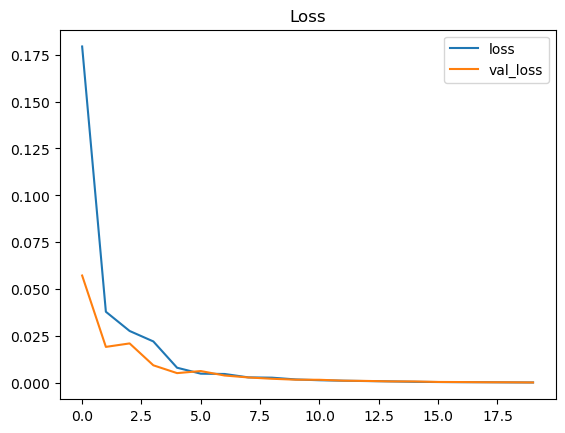

In [8]:
Model.plotting(losses)

In [9]:
Model.analysis(timeOfModel, sequentialModel)

2/2 [==============================] - 0s 1ms/step
Speed of Model (s):  0.8668
Mean Absolute Error:  0.0111
Mean Squared Error:  0.0003
Pearson Correlation:  0.9973


### Analysis:

##### MSE/MAE: As we can see, with a Mean Absolute Error of .021 and a Mean Squared error of .0007 our model is very accurate with only 3 layers in the neural network.

##### Pearson Correlation (-1 < P_val > 1): Since we are using a regression based model, and not classification, I find it better to use a Pearson Correlation rather than accuracy. The Pearson Correlation measures a parametric correlation on a distribution of linear data. With a value of .9909, our model is extremely good at predicting the weight of someone's brain.